# Linkabilty Risk examples

In [1]:
import os
import sys

import pandas as pd

sys.path.append("../..")

from leakpro.synthetic_data_attacks.anonymeter.evaluators.linkability_evaluator import LinkabilityEvaluator
from leakpro.synthetic_data_attacks.linkability_utils import linkability_risk_evaluation, load_linkability_results
from leakpro.synthetic_data_attacks.plots import plot_linkability

#Get ori and syn
#Get ori and syn
n_samples = 100
DATA_PATH = "./datasets/"
ori = pd.read_csv(os.path.join(DATA_PATH, "adults_ori.csv"), nrows=n_samples)
syn = pd.read_csv(os.path.join(DATA_PATH, "adults_syn.csv"), nrows=n_samples)

## Basic example

A very basic example requires an original (`ori`) and a synthetic (`syn`) pandas dataframes.

Afterwards, instantiate the evaluator and run `evaluate` and `print_results` methods.

**Note:** adjust `n_attacks` as needed, default value is `n_attacks=2_000`

In [2]:
evaluator = LinkabilityEvaluator(
    ori = ori,
    syn = syn,
    aux_cols = [["age", "education"],["race"]],
    n_attacks = 100
)
results = evaluator.evaluate()
results.print_results()

Success rate of main attack (and nr and total): 5.70%, 4, 100
Success rate of naive attack (and nr and total): 3.78%, 2, 100
Residual rate: 1.93%


## Linkablity risk evaluation

Perform a full linkability risk evaluation. Requires an original (`ori`) and a synthetic (`syn`) pandas dataframes. In example, results are saved to `json` file to later plot them.

**Note:** adjust `n_samples` and `n_attacks` as needed. Default values are: `n_samples=300, n_attacks=2_000`

In [3]:
#Perform linkability risk evaluation and save results
link_res = linkability_risk_evaluation(
    dataset = "adults",
    ori = ori,
    syn = syn,
    n_samples = 200,
    n_attacks = 300,
    verbose = True,
    save_results_json = True
)


Running linkability risk evaluation for `adults` with len(columns)=14
comb_sample was in combs_sample in get_n_random_combinations_linkability!
comb_sample was in combs_sample in get_n_random_combinations_linkability!
Evaluating linkability combination (and total) 0 2472
Evaluating linkability combination (and total) 100 2472
Evaluating linkability combination (and total) 200 2472
Evaluating linkability combination (and total) 300 2472
Evaluating linkability combination (and total) 400 2472
Evaluating linkability combination (and total) 500 2472
Evaluating linkability combination (and total) 600 2472
Evaluating linkability combination (and total) 700 2472
Evaluating linkability combination (and total) 800 2472
Evaluating linkability combination (and total) 900 2472
Evaluating linkability combination (and total) 1000 2472
Evaluating linkability combination (and total) 1100 2472
Evaluating linkability combination (and total) 1200 2472
Evaluating linkability combination (and total) 1300 

In [4]:
#Get linkability risk results from json file
link_res = load_linkability_results(dataset="adults")

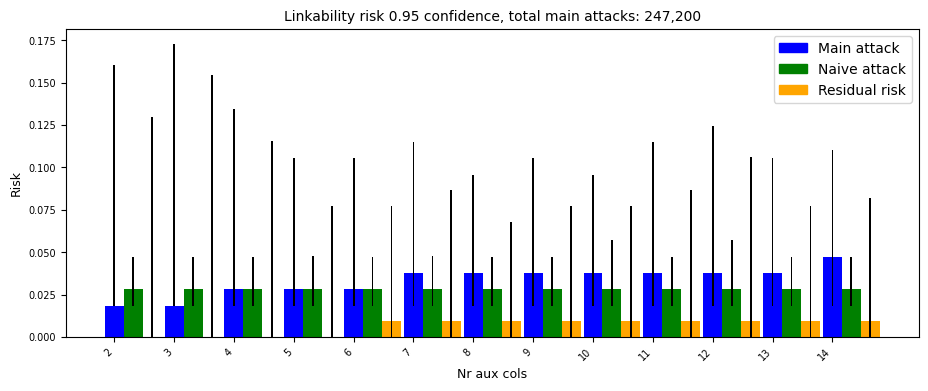

In [5]:
#Plot linkability results
plot_linkability(link_res=link_res, high_res_flag=False)